## Demo for Mercer kernels: SGD

This notebook illustrates the functions defined in terms of an RKHS (Reproducing Kernel Hilbert Space). For assignment 1, we will ask you to implement Mercer kernel regression.
The code here can serve as a starting point for this.

We display random functions of the form $f(x) = \sum_{i=1}^n \alpha_i K(x,X_i)$, where 
$K$ is a Gaussian kernel, and the $\alpha_i$ are just random normal random variables. Notice that while Mercer kernel regression works in terms of penalization, the bandwidth parameter in $K$ also affects the smoothness of the functions.

We then show the process of fitting to data using stochastic gradient descent (SGD).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from time import sleep


In [2]:
def triangular(u, h):
    return (1-np.abs(u)/h)*np.array(np.fabs(u)/h < 1)

def gaussian(u, h):
    return np.exp(-(u)**2/(2*h**2))

def compute_gram_matrix(X, kernel):
    n = len(X)
    K = np.zeros(n*n).reshape(n, n)
    for j in np.arange(n):
        K[:,j] = kernel(X - X[j], 1)
    return K


In [3]:
def mercer_kernel_function(X, x, alpha, kernel, h=.3):
    # Compute the function values on x
    K = np.zeros(len(x)*len(X)).reshape(len(x), len(X))
    for j in np.arange(K.shape[1]):
        K[:,j] = kernel(x - X[j], h)
    f = K @ alpha
    return f

def plot_function_and_data(x, f, X, y, t, sleeptime=.01):
    clear_output(wait=True)
    plt.figure(figsize=(10,6))
    plt.scatter(X, y, color='red')
    plt.plot(x, f, color='gray', linewidth=2, label='true function')
    plt.title('step=%d' % t)
    plt.show()
    sleep(sleeptime)
    


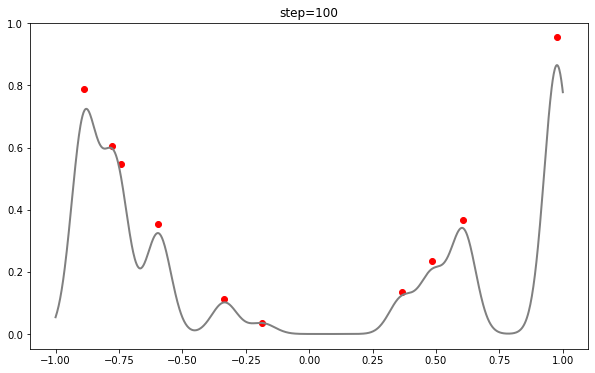

In [15]:
min_x, max_x = -1, 1
x = np.linspace(min_x, max_x, 1000)

(h, n, lam) = (.05, 10, .1)

alpha = np.random.normal(size=n)
np.random.seed(421)
X = np.sort(np.random.uniform(low=min_x, high=max_x, size=n))
y = X*X

kernel = gaussian
K = np.zeros(len(X)*len(X)).reshape(len(X), len(X))
for j in np.arange(K.shape[1]):
    K[:,j] = kernel(X - X[j], h)

f = mercer_kernel_function(X, x, alpha, kernel=kernel, h=h)
plot_function_and_data(x, f, X, y, t=0, sleeptime=2)

for step in range(101):
    f = mercer_kernel_function(X, x, alpha, kernel=kernel, h=h)
    if step % 10 == 0:
        plot_function_and_data(x, f, X, y, t=step, sleeptime=.5)
    alpha = alpha + stepsize * (K.T @ (y - K @ alpha) - lam * K @ alpha)
